In [7]:
from Procedures import *
from Preprocess import readStopWords

import pandas as pd
import os

/home/chengyuli/miniconda3/envs/ML/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/chengyuli/miniconda3/envs/ML/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


num_topics = 1
Perplexity = 278.7023586674138
Coherence = 0.2999920198017582
num_topics = 2
Perplexity = 372.37360707386154
Coherence = 0.561707653244682
num_topics = 3
Perplexity = 423.31914077379633
Coherence = 0.5903181407157153
num_topics = 4
Perplexity = 473.1772118762334
Coherence = 0.4799495507527419
num_topics = 5
Perplexity = 442.35480267062144
Coherence = 0.40461077475576834
num_topics = 6
Perplexity = 760.7398494239264
Coherence = 0.512637398995167
num_topics = 7
Perplexity = 658.6575208784363
Coherence = 0.4700672150659201
num_topics = 8
Perplexity = 687.0656937304553
Coherence = 0.4424113772777003
num_topics = 9
Perplexity = 715.8741947588596
Coherence = 0.4556533393168929
num_topics = 10
Perplexity = 945.513116851853
Coherence = 0.4109640707856067


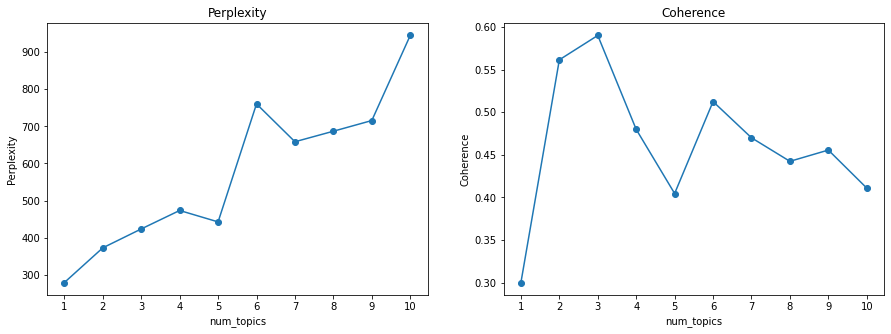

In [8]:
# 读取csv
df = pd.read_csv('/home/chengyuli/yanshan/data/DataScience/finalData/news.csv')

# 读取停用词表
stopwordsPath = "/home/chengyuli/yanshan/data/DataScience/stop_words_ch.txt"
stopwords = readStopWords(stopwordsPath)

# 设置时间片，以天为单位
time_interval = 30
    
# 开始分割时间片
list_df = splitWithTime(df, time_interval, lang='en-us')
    
# 预处理
for each in list_df:
    each['df'] = preprocess(each['df'], stopwords)
    
df_test = pd.concat([df['df'] for df in list_df[:-1]])
# 主题提取
num_topics = 10
model_list, dic, corpus_tfidf = TopicExtraction(df_test['contents'].tolist(), num_topics)

/home/chengyuli/miniconda3/envs/ML/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


For n_clusters = 2, the average silhouette_score is : 0.8199998956094801
For n_clusters = 3, the average silhouette_score is : 0.792251781954159
For n_clusters = 4, the average silhouette_score is : 0.7629752263086842
For n_clusters = 5, the average silhouette_score is : 0.7666840610483281
For n_clusters = 6, the average silhouette_score is : 0.7486997791211689
For n_clusters = 7, the average silhouette_score is : 0.7384556234720265
For n_clusters = 8, the average silhouette_score is : 0.7449572640372899
Best K value based on silhouette score: 2
For n_clusters = 2, the average silhouette_score is : 0.8199998956094801
For n_clusters = 3, the average silhouette_score is : 0.792251781954159
For n_clusters = 4, the average silhouette_score is : 0.763913793546705
For n_clusters = 5, the average silhouette_score is : 0.7666840610483281
For n_clusters = 6, the average silhouette_score is : 0.7490758497400883
For n_clusters = 7, the average silhouette_score is : 0.7381573180603076
For n_cluste

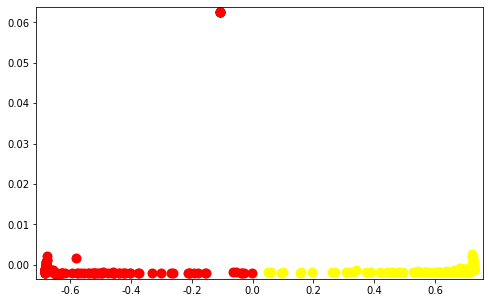

热点话题: ['金砖', '美国', '决议', '安理会', '推动', '中国', '国家', '解决', '峰会', '国际'], 属于此话题的文档数: 137
字符串热点话题: 金砖 美国 决议 安理会 推动 中国 国家 解决 峰会 国际
情感分析得分：6
热点话题: ['加沙', '医院', '人', '近东', '工程处', '救济', '以色列', '厅', '以军', '儿童'], 属于此话题的文档数: 121
字符串热点话题: 加沙 医院 人 近东 工程处 救济 以色列 厅 以军 儿童
情感分析得分：1


In [9]:
# 选择最优主题个数
topics_count = 3
lda_model = model_list[topics_count - 1]
    
# 热点话题分析
emotional_dict_path = "/home/chengyuli/yanshan/data/DataScience/sentimentDict"
num_words = 10
    
all_top_k, doc_indexs = hotSpotAnalysis(lda_model=lda_model,
                                        df=df_test,
                                        dic=dic,
                                        topic_nums=topics_count,
                                        num_words=num_words,
                                        emotional_dict_path=emotional_dict_path)

/home/chengyuli/miniconda3/envs/ML/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


final字符串热点话题: 金砖 美国 决议 安理会 推动 中国 国家 解决 峰会 国际 加沙 医院 人 近东 工程处 救济 以色列 厅 以军 儿童


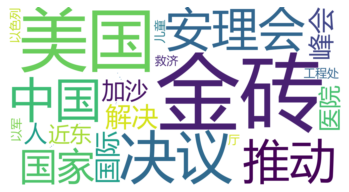

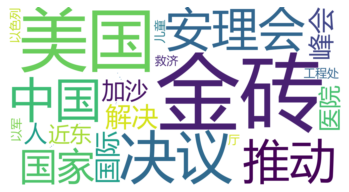

In [10]:
# 可视化
basedir = "/home/chengyuli/yanshan/CodeRepo/DataScience/"
wordCloud_pic_path = "/home/chengyuli/yanshan/data/DataScience/WordCloud/Tu-160.jpg"
wordCloud_font_path = "/home/chengyuli/yanshan/data/DataScience/WordCloud/MSYH.ttc"

wordCloud_save_path = os.path.join(os.path.dirname(basedir), "output/wordCloud.jpg")
pyLDAvis_save_path = os.path.join(os.path.dirname(basedir), "output/topic.html")

visualize(lda_model=lda_model,
          corpus_tfidf=corpus_tfidf,
          dic=dic,
          pyLDAvis_save_path=pyLDAvis_save_path,
          all_top_k=all_top_k,
          wordCloud_pic_path=wordCloud_pic_path,
          wordCloud_font_path=wordCloud_font_path,
          wordCloud_save_path=wordCloud_save_path) 

In [11]:
# SVM预测
topic_doc = merge(all_top_k, doc_indexs)

# 待预测数据
new_text_data = list_df[-1]['df']['contents'].apply(" ".join).tolist()

doc_list = df_test['contents'].tolist()

# 进行预测
topic_prob = SVM_Predict(new_documents=new_text_data, topic_doc=topic_doc, doc_list=doc_list)
print(topic_prob)

/home/chengyuli/miniconda3/envs/ML/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


已有的热点话题为['加沙 医院 人 近东 工程处 救济 以色列 厅 以军 儿童', '金砖 美国 决议 安理会 推动 中国 国家 解决 峰会 国际']
总共有类别数：2
Accuracy: 0.9038461538461539
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        31
           1       0.86      0.90      0.88        21

    accuracy                           0.90        52
   macro avg       0.90      0.90      0.90        52
weighted avg       0.91      0.90      0.90        52

[(1, 0.9999876154086079), (0, 0.9728989675935853), (0, 0.9082280454569945), (0, 0.998630049656005), (1, 0.6957276619960113), (1, 0.47114542717342067), (0, 0.99921094151199), (1, 0.4748235698606185), (0, 0.9720299669520812), (0, 0.8870887103692124), (0, 0.9941913261021839), (0, 0.9904852262089731), (0, 0.9518935334215031), (1, 0.996552079323134), (0, 0.7855145761728898), (0, 0.8482343706467655), (0, 0.784871333516234), (0, 0.9955249978595845), (0, 0.9916187172055628), (1, 0.993817181008721), (0, 0.99577489891721), (1, 0.9918499898

In [13]:
threshold = 5
trust = 0.8

Judge(topic_prob, threshold, trust)

Maybe new topic merges, need to rerun LDA.


/home/chengyuli/miniconda3/envs/ML/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
